In [1]:
import pandas as pd

In [2]:
df_input = pd.read_excel('../SalCIS_ORF.xlsx')

In [3]:
import numpy as np

In [4]:
df_input['FASTA protein sequence'] = df_input['FASTA protein sequence'].str.replace('*','')

In [5]:
df_input = df_input.dropna(axis=0)

In [6]:
fasta_column_header = 'FASTA protein sequence'

In [7]:
import os
import re
import json

In [8]:
# Read the base JSON template from a file
with open("./example1-1.json", "r") as file:
    base_json = json.load(file)

for index,row in df_input.iterrows():
    
    folder_name = './'+row['Given Nomenclature']
    if os.path.isdir(folder_name):
        pass
    else:
        os.mkdir(folder_name)
    json_folder = folder_name+'/JSONs'
    if os.path.isdir(json_folder):
        pass
    else:
        os.mkdir(json_folder)
    
    base_json['sequences'][0]['protein']['sequence'] = row['FASTA protein sequence']
    
    for index2, row2 in df_input.iterrows():

        json_data = json.loads(json.dumps(base_json))
    
        json_data["name"] = row["Given Nomenclature"]

        json_data["sequences"][1]["protein"]["sequence"] = row2["FASTA protein sequence"]
    
        # Save the JSON file with the name from the "name" column
        file_name = f"{json_folder}/{row['Given Nomenclature']}_{row2['Given Nomenclature']}.json"
        with open(file_name, "w") as json_file:
            json.dump(json_data, json_file, indent=4)

    

In [9]:
import logging
logging.basicConfig(level=logging.INFO)
logging.info("Processing started...")
import pandas as pd
import numpy as np
import os
import json
import argparse
from Bio.PDB import MMCIFParser, PDBIO
import argparse
import sys
from collections import defaultdict
import pdb


# Use the provided home_dir
home_dir = './'

output_dirs = []
for folder in os.listdir(home_dir):
    folder_path = os.path.join(home_dir, folder, 'output')
    if not os.path.isdir(folder_path):
        continue
    for prediction in os.listdir(folder_path):
        prediction_folder_path = os.path.join(folder_path, prediction)
        if os.path.isdir(prediction_folder_path):
            output_dirs.append(prediction_folder_path)

data = []
# Traverse the main folder
for output_dir in output_dirs:
    
    for main_folder in os.listdir(output_dir):
        main_folder_path = os.path.join(output_dir, main_folder)
        
        #print(main_folder_path)
        
        # Skip if it's not a directory
        if not os.path.isdir(main_folder_path):
            print(f"Not a directory {main_folder_path}")
            continue
        
     # Traverse only the seed-x_sample-y directories
        for seed_sample_folder in os.listdir(main_folder_path):
            seed_sample_path = os.path.join(main_folder_path, seed_sample_folder)
            print(seed_sample_path)
            # Ensure it's a directory and matches the pattern 'seed-x_sample-y'
            if not os.path.isdir(seed_sample_path) or 'seed-' not in seed_sample_folder or 'sample-' not in seed_sample_folder:
                print(f"Does not match the expected naming system of the seed/sample folder \n{seed_sample_path} ")
                continue
            
            # Extract seed and sample values from the folder name
            try:
                seed = int(seed_sample_folder.split('_')[0].split('-')[1])
                sample = int(seed_sample_folder.split('_')[1].split('-')[1])
            except (IndexError, ValueError) as e:
                print(f"Skipping folder {seed_sample_folder} due to naming error: {e}")
                continue
            
            # Look for the JSON and CIF files in the folder
            json_file = next((f for f in os.listdir(seed_sample_path) if f.endswith("summary_confidences.json")), None)
            cif_file = next((f for f in os.listdir(seed_sample_path) if f.endswith(".cif")), None)
            
            if not json_file or not cif_file:
                print(f"Skipping {seed_sample_path} due to missing files: JSON={json_file}, CIF={cif_file}")
                continue
            
            # Load JSON data
            json_path = os.path.join(seed_sample_path, json_file)
            print(json_path)
            with open(json_path, 'r') as f:
                json_data = json.load(f)
            
            # Add data to the list
            data.append({
                'main_folder': main_folder,  # The main folder name
                'seed': seed,               # Extracted seed
                'sample': sample,           # Extracted sample
                'cif_path': os.path.join(seed_sample_path, cif_file),  # Full path to the .cif file
                **json_data  # Add all JSON data as columns
            })

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data)
logging.info("data read to dataframe...")



INFO:root:Processing started...


./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-0
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-0/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-0
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-0/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-1
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-1/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-1
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-1/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-83_sample-1
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-83_sample-1/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-10_sample-1
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-10_sample-1/summary_confidences.json
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-10_sample-0
./SalCIS15/output/SalCIS15_SalCIS13/salcis15

INFO:root:data read to dataframe...


./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-0
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-0/summary_confidences.json
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_model.cif
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_model.cif 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-0
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-0/summary_confidences.json
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_confidences.json
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_confidences.json 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_data.json
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_data.json 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-61_sample-1
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-61_sample-1/

In [13]:
df['main_folder'].value_counts()

main_folder
salcis15     450
salcis12     450
salcis13     450
salcis16b    450
salcis8      450
salcis1      450
salcis7      450
salcis9      450
salcis11     450
salcis10     450
salcis16a    450
salcis5      450
salcis2      450
salcis6      331
Name: count, dtype: int64

In [10]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,ptm,ranking_score
0,salcis15,44,0,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.09, 0.09]","[[0.59, 0.09], [0.09, 0.65]]","[[0.76, 28.92], [29.96, 0.76]]","[0.59, 0.65]",0.04,0.0,0.09,0.43,0.18
1,salcis15,33,0,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.11, 0.11]","[[0.58, 0.11], [0.11, 0.65]]","[[0.76, 23.41], [22.75, 0.76]]","[0.58, 0.65]",0.04,0.0,0.11,0.42,0.19
2,salcis15,44,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.09, 0.09]","[[0.54, 0.09], [0.09, 0.64]]","[[0.76, 29.6], [28.71, 0.76]]","[0.54, 0.64]",0.06,0.0,0.09,0.40,0.18
3,salcis15,33,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.11, 0.11]","[[0.59, 0.11], [0.11, 0.66]]","[[0.76, 23.18], [22.83, 0.76]]","[0.59, 0.66]",0.06,0.0,0.11,0.43,0.20
4,salcis15,83,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.1, 0.1]","[[0.55, 0.1], [0.1, 0.64]]","[[0.76, 25.15], [22.64, 0.76]]","[0.55, 0.64]",0.04,0.0,0.10,0.41,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,salcis2,83,4,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.18, 0.18]","[[0.89, 0.18], [0.18, 0.8]]","[[0.76, 20.87], [19.25, 0.76]]","[0.89, 0.8]",0.02,0.0,0.18,0.66,0.28
6177,salcis2,10,3,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.12, 0.12]","[[0.88, 0.12], [0.12, 0.8]]","[[0.76, 25.84], [25.13, 0.76]]","[0.88, 0.8]",0.02,0.0,0.12,0.64,0.24
6178,salcis2,61,2,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.12, 0.12]","[[0.88, 0.12], [0.12, 0.81]]","[[0.76, 26.3], [24.34, 0.76]]","[0.88, 0.81]",0.02,0.0,0.12,0.64,0.23
6179,salcis2,61,3,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.11, 0.11]","[[0.88, 0.11], [0.11, 0.8]]","[[0.76, 27.28], [24.73, 0.76]]","[0.88, 0.8]",0.02,0.0,0.11,0.64,0.23


In [11]:
df.columns

Index(['main_folder', 'seed', 'sample', 'cif_path', 'chain_iptm',
       'chain_pair_iptm', 'chain_pair_pae_min', 'chain_ptm',
       'fraction_disordered', 'has_clash', 'iptm', 'ptm', 'ranking_score'],
      dtype='object')

In [12]:
# Function to convert .cif to .pdb in the same directory
def convert_cif_to_pdb_in_place(cif_path):
    '''
    Takes a .cif file and converts it, in the same location to a .pdb file,
    returns the path to the pdb file.
    '''
    # Get the directory and base name of the .cif file
    cif_dir = os.path.dirname(cif_path)
    pdb_filename = os.path.basename(cif_path).replace('.cif', '.pdb')
    pdb_path = os.path.join(cif_dir, pdb_filename)
    
    # Parse and write the PDB file
    parser = MMCIFParser(QUIET=True)
    try:
        structure = parser.get_structure('structure', cif_path)
    except Exception as e:
        print(f"Error parsing CIF file {cif_path}: {e}")
        return None
    io = PDBIO()
    io.set_structure(structure)
    io.save(pdb_path)
    
    return pdb_path

# Apply the function to the DataFrame
df['pdb_path'] = df['cif_path'].apply(lambda cif: convert_cif_to_pdb_in_place(cif))
logging.info("converted all cifs to pdbs for pDockQ calculation...")

#####################FUNCTIONS#########################
def parse_atm_record(line):
    '''Get the atm record
    '''
    record = defaultdict()
    record['name'] = line[0:6].strip()
    record['atm_no'] = int(line[6:11])
    record['atm_name'] = line[12:16].strip()
    record['atm_alt'] = line[17]
    record['res_name'] = line[17:20].strip()
    record['chain'] = line[21]
    record['res_no'] = int(line[22:26])
    record['insert'] = line[26].strip()
    record['resid'] = line[22:29]
    record['x'] = float(line[30:38])
    record['y'] = float(line[38:46])
    record['z'] = float(line[46:54])
    record['occ'] = float(line[54:60])
    record['B'] = float(line[60:66])

    return record


def read_pdb(pdbfile):
    '''Read a pdb file predicted with AF and rewritten to contain all chains
    '''

    chain_coords, chain_plddt = {}, {}
    with open(pdbfile, 'r') as file:
        for line in file:
            if not line.startswith('ATOM'):
                continue
            record = parse_atm_record(line)
            # Get CB - CA for GLY
            if record['atm_name'] == 'CB' or (record['atm_name'] == 'CA' and record['res_name'] == 'GLY'):
                if record['chain'] in [*chain_coords.keys()]:
                    chain_coords[record['chain']].append([record['x'], record['y'], record['z']])
                    chain_plddt[record['chain']].append(record['B'])
                else:
                    chain_coords[record['chain']] = [[record['x'], record['y'], record['z']]]
                    chain_plddt[record['chain']] = [record['B']]

    # Convert to arrays
    for chain in chain_coords:
        chain_coords[chain] = np.array(chain_coords[chain])
        chain_plddt[chain] = np.array(chain_plddt[chain])

    return chain_coords, chain_plddt

def calc_pdockq(chain_coords, chain_plddt, t=8):
    '''Calculate the pDockQ scores
    pdockQ = L / (1 + np.exp(-k*(x-x0)))+b
    L= 0.724 x0= 152.611 k= 0.052 and b= 0.018
    '''
    if len(chain_coords) != 2:
        print(f"Skipping PDB file due to unexpected number of chains: {len(chain_coords)}")
        return 0
    # Get coords and plddt per chain
    ch1, ch2 = [*chain_coords.keys()]
    coords1, coords2 = chain_coords[ch1], chain_coords[ch2]
    plddt1, plddt2 = chain_plddt[ch1], chain_plddt[ch2]

    # Calc 2-norm
    mat = np.append(coords1, coords2, axis=0)
    a_min_b = mat[:, np.newaxis, :] - mat[np.newaxis, :, :]
    dists = np.sqrt(np.sum(a_min_b.T ** 2, axis=0)).T
    l1 = len(coords1)
    contact_dists = dists[:l1, l1:]  # upper triangular --> first dim = chain 1
    contacts = np.argwhere(contact_dists <= t)
    #print(contacts,l1)
    if contacts.shape[0] < 1:
        pdockq = 0

    else:
        # Get the average interface plDDT
        avg_if_plddt = np.average(np.concatenate([plddt1[np.unique(contacts[:, 0])], plddt2[np.unique(contacts[:, 1])]]))
        # Get the number of interface contacts
        n_if_contacts = contacts.shape[0]
        x = avg_if_plddt * np.log10(n_if_contacts)
        pdockq = 0.724 / (1 + np.exp(-0.052 * (x - 152.611))) + 0.018

        pdockq_thresholds = np.array([0.67333079, 0.65666073, 0.63254566, 0.62604391,
                                      0.60150931, 0.58313803, 0.5647381, 0.54122438, 0.52314392,
                                      0.49659878, 0.4774676, 0.44661346, 0.42628389, 0.39990988,
                                      0.38479715, 0.3649393, 0.34526004, 0.3262589, 0.31475668,
                                      0.29750023, 0.26673725, 0.24561247, 0.21882689, 0.19651314,
                                      0.17606258, 0.15398168, 0.13927677, 0.12024131, 0.09996019,
                                      0.06968505, 0.02946438])
        inds = np.argwhere(pdockq_thresholds >= pdockq)
        
    return pdockq


def get_pae_region(contacts,l1,pae_file):
    import json
    json_file_path = pae_file
    
    # Open the JSON file and read its contents
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)

    predicted_aligned_error_sliced = pd.DataFrame(data[0]['predicted_aligned_error'])
    region_values=[]
    for pair in contacts:
    # Slice the heatmap data to get the values for the specified region
        pair_2 = [pair[0],pair[1]+l1]
        region_values.append(predicted_aligned_error_sliced.iloc[pair_2])
    return (np.mean(region_values))
    
df['pdockq']=np.nan

for i in range(0,len(df)):
    chain_coords, chain_plddt = read_pdb(df.loc[i,'pdb_path'])
    pdockq = calc_pdockq(chain_coords, chain_plddt,)
    df.loc[i,'pdockq']=pdockq
    print(f"{df.loc[i,'seed']} {df.loc[i,'sample']} {pdockq}")

logging.info("Calculated all pDockQs.")

df['avg_ipae']=df['chain_pair_pae_min'].apply(lambda x: (x[0][1] + x[1][0]) / 2)
df.to_csv('./output.csv')
logging.info("Process finished.")


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104eec390>>
Traceback (most recent call last):
  File "/Users/phr361/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

# End of updated script

In [ ]:
df['main_folder'].value_counts()

In [ ]:
df[['protein1', 'protein2']] = df['pdb_path'].str.extract(r'/([^/_]+)_([^/]+)/')

In [21]:
df=df.sort_values('protein1')

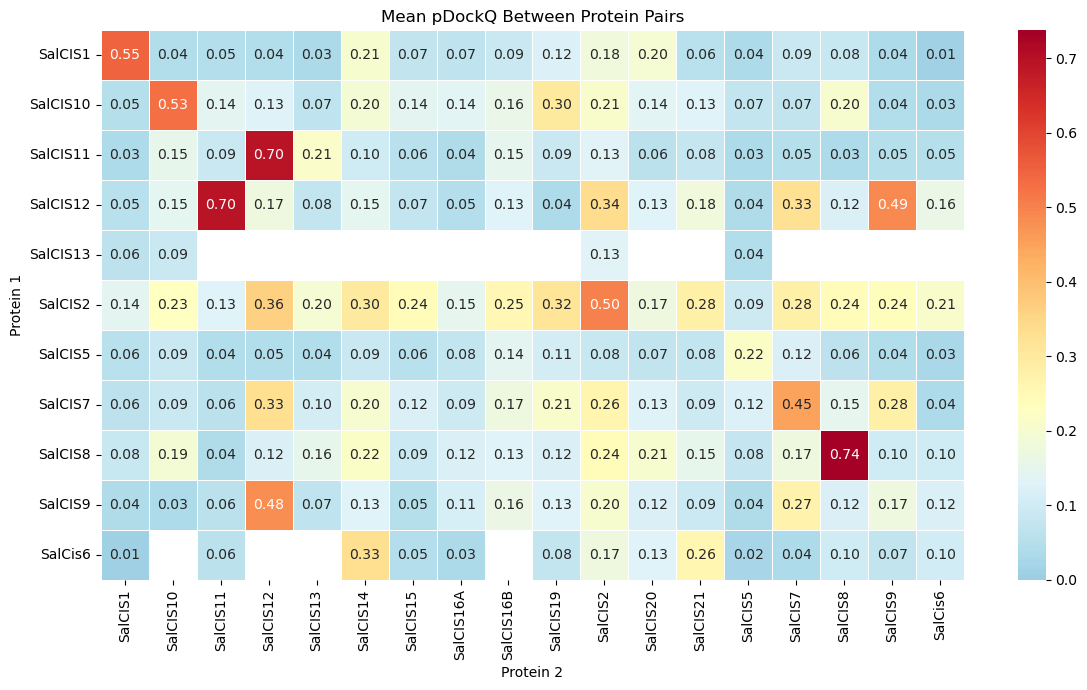

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['pdockq'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='pdockq')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu_r', linewidths=0.5,
            center=0.23,vmin=0.0,
           )
plt.title("Mean pDockQ Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

In [30]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,ptm,ranking_score,pdb_path,pdockq,avg_ipae,protein1,protein2
1169,salcis1,33,1,./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed...,"[0.06, 0.06]","[[0.46, 0.06], [0.06, 0.73]]","[[0.76, 26.91], [26.72, 0.76]]","[0.46, 0.73]",0.02,0.0,0.06,0.36,0.13,./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed...,0.107509,26.815,SalCIS1,SalCIS10
1041,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,"[0.08, 0.08]","[[0.62, 0.08], [0.08, 0.59]]","[[0.76, 28.95], [29.53, 0.76]]","[0.62, 0.59]",0.03,0.0,0.08,0.49,0.18,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,0.000000,29.240,SalCIS1,SalCIS15
1042,salcis1,33,0,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,"[0.09, 0.09]","[[0.61, 0.09], [0.09, 0.58]]","[[0.76, 28.8], [28.6, 0.76]]","[0.61, 0.58]",0.04,0.0,0.09,0.47,0.19,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,0.167321,28.700,SalCIS1,SalCIS15
1043,salcis1,44,1,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,"[0.08, 0.08]","[[0.63, 0.08], [0.08, 0.6]]","[[0.76, 29.7], [30.36, 0.76]]","[0.63, 0.6]",0.03,0.0,0.08,0.49,0.18,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,0.000000,30.030,SalCIS1,SalCIS15
1044,salcis1,33,1,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,"[0.09, 0.09]","[[0.63, 0.09], [0.09, 0.58]]","[[0.76, 28.24], [29.12, 0.76]]","[0.63, 0.58]",0.04,0.0,0.09,0.48,0.18,./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed...,0.030174,28.680,SalCIS1,SalCIS15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,salcis6,61,3,./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed...,"[0.35, 0.35]","[[0.11, 0.35], [0.35, 0.7]]","[[0.76, 4.95], [3.5, 0.76]]","[0.11, 0.7]",0.47,0.0,0.35,0.57,0.63,./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed...,0.253869,4.225,SalCis6,SalCIS21
1665,salcis6,61,4,./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed...,"[0.33, 0.33]","[[0.11, 0.33], [0.33, 0.7]]","[[0.76, 5.31], [3.58, 0.76]]","[0.11, 0.7]",0.48,0.0,0.33,0.57,0.61,./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed...,0.236721,4.445,SalCis6,SalCIS21
1666,salcis6,44,0,./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed...,"[0.14, 0.14]","[[0.1, 0.14], [0.14, 0.65]]","[[0.77, 25.08], [25.69, 0.76]]","[0.1, 0.65]",0.23,0.0,0.14,0.62,0.35,./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed...,0.135138,25.385,SalCis6,SalCIS19
1668,salcis6,44,1,./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed...,"[0.14, 0.14]","[[0.09, 0.14], [0.14, 0.64]]","[[0.77, 24.9], [25.61, 0.76]]","[0.09, 0.64]",0.23,0.0,0.14,0.62,0.35,./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed...,0.144277,25.255,SalCis6,SalCIS19


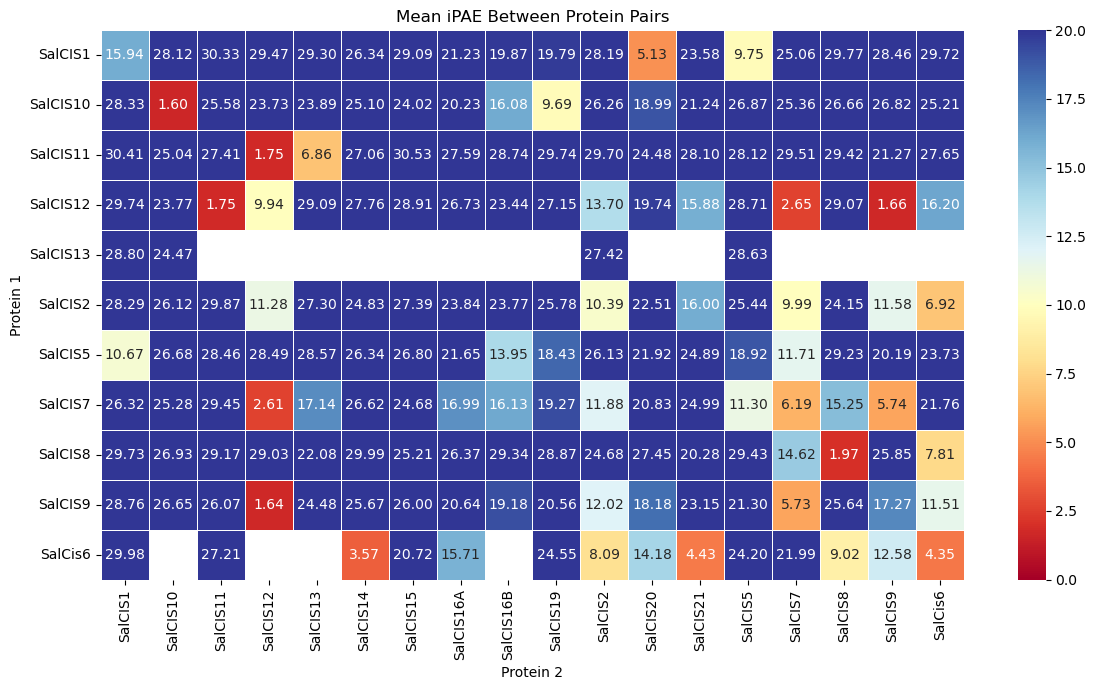

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['avg_ipae'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='avg_ipae')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu', linewidths=0.5,
            center=10,vmin=0.0,vmax=20,
           )
plt.title("Mean iPAE Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()